<a href="https://colab.research.google.com/github/JeyyGit/Jeyy-Bot/blob/main/week_2/Polynomial_Regression_EconomicOfScale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Nama: Jaisy Malikulmulki Arasy
# NIM: 1103202201
# Tugas 2
# Polynomial Regression EconomicOfScale

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# path file csv
file_path = '/content/drive/My Drive/Dataset/EconomiesOfScale.csv'

df = pd.read_csv(file_path)
df

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013
...,...,...
995,8.099710,23.855067
996,8.739752,27.536542
997,8.780888,25.973787
998,8.897700,25.138311


In [ ]:
df.head(10)

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013
5,1.307435,100.000000
6,1.339386,94.759756
7,1.379044,67.185383
8,1.420000,72.886041
9,1.473948,61.967696


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [ ]:
df.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


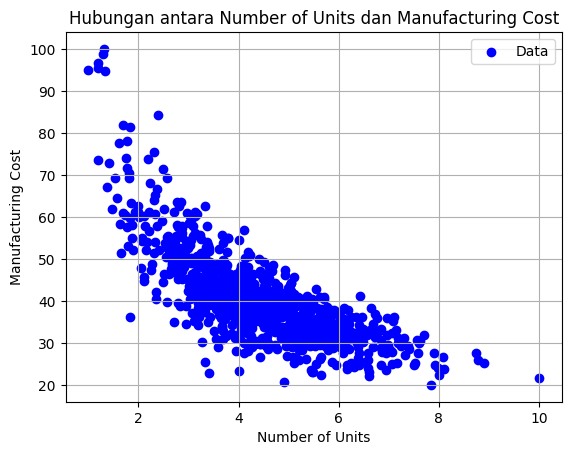

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df["Number of Units"], df["Manufacturing Cost"], marker='o', color='b', label='Data')

# Memberi label pada sumbu-sumbu
plt.xlabel('Number of Units')
plt.ylabel('Manufacturing Cost')

# Memberi judul plot
plt.title('Hubungan antara Number of Units dan Manufacturing Cost')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.grid(True)
plt.show()

In [ ]:
X = df[["Number of Units"]]  # Kolom label (fitur)
y = df["Manufacturing Cost"]  # Kolom target

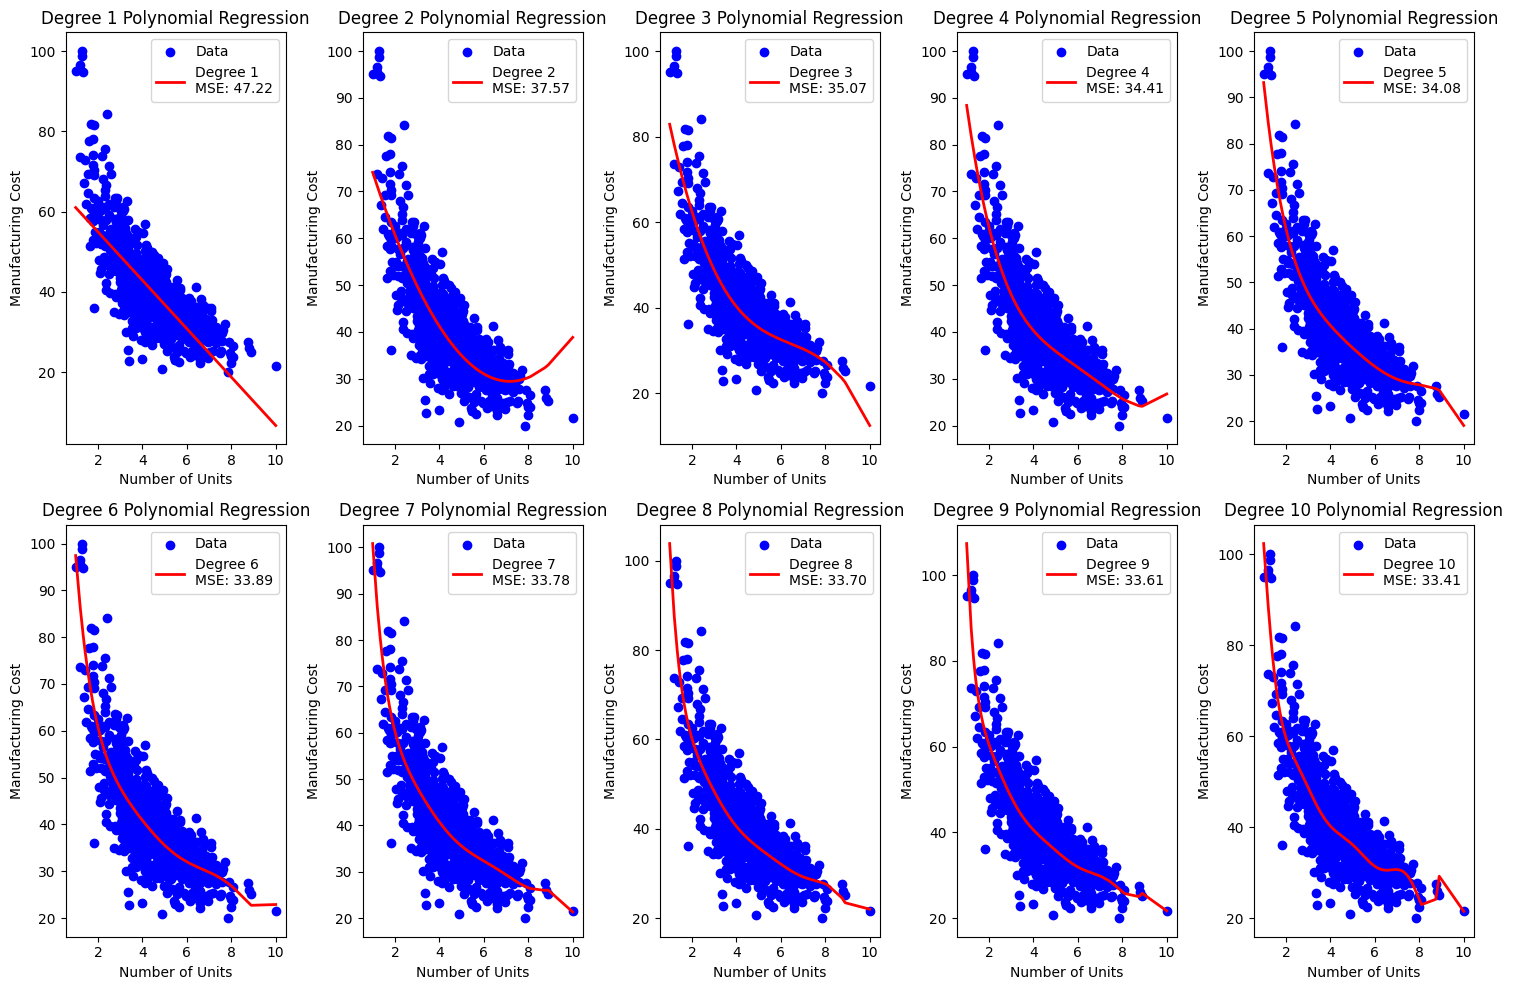

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Range derajat polinomial yang akan diuji
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Mengatur ukuran plot
plt.figure(figsize=(15, 10))

for i, degree in enumerate(degrees):
    # Mengubah fitur menjadi polinomial dengan derajat tertentu
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)

    # Membuat model regresi linier dengan fitur polinomial
    model = LinearRegression()
    model.fit(X_poly, y)

    # Memprediksi nilai y menggunakan model
    y_pred = model.predict(X_poly)

    # Menghitung mean squared error
    mse = mean_squared_error(y, y_pred)

    # Menampilkan hasil pada subplot yang sesuai
    plt.subplot(2, 5, i + 1)
    plt.scatter(X, y, color='blue', label='Data')
    plt.plot(X, y_pred, color='red', linewidth=2, label=f'Degree {degree}\nMSE: {mse:.2f}')
    plt.title(f'Degree {degree} Polynomial Regression')
    plt.xlabel('Number of Units')
    plt.ylabel('Manufacturing Cost')
    plt.legend()

plt.tight_layout()
plt.show()